In [1]:
import cv2
import os
import numpy as np
from keras import layers, models, optimizers
from keras.models import model_from_json
from keras.models import load_model
import matplotlib.pyplot as plt
%matplotlib inline
os.environ['KMP_DUPLICATE_LIB_OK']='True'

Using TensorFlow backend.


In [2]:
npy_dir='./npy_file/'
save_dir='./result'

In [3]:
with open(save_dir+"/model_json.json", 'r') as f:
    model = model_from_json(f.read())
    
model.load_weights(save_dir+"/model.h5")

print (model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
activation_7 (Activation)    (None, 126, 126, 32)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 124, 124, 32)      9248      
_________________________________________________________________
activation_8 (Activation)    (None, 124, 124, 32)      0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
activation_9 (Activation)    (None, 60, 60, 64)        0         
__________

Tahmin edilen Sonuc ==> 6


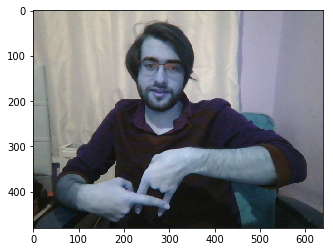

In [6]:
IMG_SIZE = 128
image = cv2.imread("/Users/yusufsatilmis/Desktop/Dataset/bitirme/data/7/h_0_56.jpg")
plt.imshow(image)
x1, y1, x2, y2 = 201, 251, 440, 480
image = image[y1:y2, x1:x2]
image = cv2.resize(image,(IMG_SIZE,IMG_SIZE))

#image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
test = np.array( image ).reshape(-1, IMG_SIZE, IMG_SIZE, 3).astype('float32') / 255.
pred = model.predict(test)
print "Tahmin edilen Sonuc ==> " +str(np.argmax(pred[0]))